# Permutation Importance for classification

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from alibi.explainers.permutation_importance import PermutationImportance, plot_permutation_importance
from sklearn.metrics import accuracy_score, f1_score

%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_informative=3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.0,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = LogisticRegression().fit(X_train, y_train)

In [3]:
explainer = PermutationImportance(predictor=clf.predict, verbose=True)

In [49]:
def score_accuracy(y_true, y_pred, sample_weight):
    return accuracy_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

def loss_f1(y_true, y_pred, sample_weight):
    return 1 - f1_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

In [66]:
exp = explainer.explain(X=X_test,
                        y=y_test,
                        loss_fns={'1-f1': loss_f1},
                        score_fns={'accuracy': score_accuracy},
                        n_repeats=100,
                        method='estimate',
                        kind='difference')

100%|██████████| 10/10 [00:01<00:00,  9.47it/s]


In [69]:
exp;

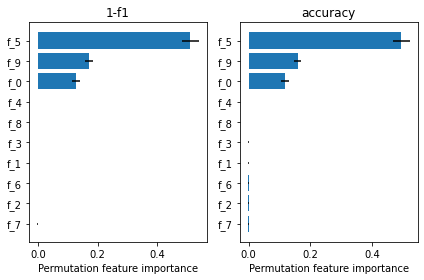

In [68]:
axes = plot_permutation_importance(exp=exp)